## 1) Carga del conjunto de datos

En este notebook trabajaremos con un conjunto de datos con características de móviles y trataremos de predecir su rango de precio. Las variables del conjunto de datos son las siguientes:

- `battery_power`: Total energy a battery can store in one time measured in mAh
- `blue`: Has bluetooth or not
- `clock_speed`: speed at which microprocessor executes instructions
- `dual_sim`: Has dual sim support or not
- `fc`: Front Camera mega pixels
- `four_g`: Has 4G or not
- `int_memory`: Internal Memory in Gigabytes
- `m_dep`: Mobile Depth in cm
- `mobile_wt`: Weight of mobile phone
- `n_cores`: Number of cores of processor
- `pc`: Primary Camera mega pixels
- `px_height`: Pixel Resolution Height
- `px_width`: Pixel Resolution Width
- `ram`: Random Access Memory in Mega Bytes
- `sc_h`: Screen Height of mobile in cm
- `sc_w`: Screen Width of mobile in cm
- `talk_time`: longest time that a single battery charge will last when you are
- `three_g`: Has 3G or not
- `touch_screen`: Has touch screen or not
- `wifi`: Has wifi or not
- `price_range`: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

Crea un dataframe a partir del fichero `mobile_phones.csv` que se proporciona junto con la práctica. Como pandas no tiene forma de saber que la variable `price_range` es en realidad categórica, debes indicárselo tú. 

__Nota__: existen otras variables que también son categóricas (como `blue`, `dual_sim`, etc.) pero como sólo pueden tomar dos valores (son booleanas), en nuestro caso no será problamático interpretarlas como números.

Cargamos el dataframe y convertimos `price_range` en catergórica.

In [1]:
import pandas as pd

# Cargamos los datos del fichero en un dataframe.
data = pd.read_csv('mobile_phones.csv')

#Convertimos la columna de precios en categórica.
data["price_range"] = data["price_range"].astype("category")

data.head().head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.dtypes


battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables numéricas con la variable `price_range`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las 4 variables numéricas con mayor correlación con la variable `price_range`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 4 categorías a predecir. ¿Hay pares variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [3]:
grupos = data.groupby("price_range")

print("Low cost:", len(grupos.get_group(0)))
print("Medium cost:", len(grupos.get_group(1)))
print("High cost:", len(grupos.get_group(2)))
print("Very high cost:", len(grupos.get_group(3)))

print("Low cost:", len(grupos.get_group(0)))
print("Medium cost:", len(grupos.get_group(1)))
print("High cost:", len(grupos.get_group(2)))
print("Very high cost:", len(grupos.get_group(3)))

Low cost: 500
Medium cost: 500
High cost: 500
Very high cost: 500
Low cost: 500
Medium cost: 500
High cost: 500
Very high cost: 500


Las clases están perfectamente balanceadas.

In [67]:
data.dtypess

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

In [14]:
for i in range(len(data.columns) - 1):
    print(f'corr({data.columns[i]}, price_range) =', round(data["price_range"].corr(data.iloc[:, i]), 2))


corr(battery_power, price_range) = 0.2
corr(blue, price_range) = 0.02
corr(clock_speed, price_range) = -0.01
corr(dual_sim, price_range) = 0.02
corr(fc, price_range) = 0.02
corr(four_g, price_range) = 0.01
corr(int_memory, price_range) = 0.04
corr(m_dep, price_range) = 0.0
corr(mobile_wt, price_range) = -0.03
corr(n_cores, price_range) = 0.0
corr(pc, price_range) = 0.03
corr(px_height, price_range) = 0.15
corr(px_width, price_range) = 0.17
corr(ram, price_range) = 0.92
corr(sc_h, price_range) = 0.02
corr(sc_w, price_range) = 0.04
corr(talk_time, price_range) = 0.02
corr(three_g, price_range) = 0.02
corr(touch_screen, price_range) = -0.03
corr(wifi, price_range) = 0.02


Las más relacionadas con `price_range` son: `ram`, `px_height`, `px_width`, y `battery_power`

In [12]:
df = data[['battery_power', 'ram', 'px_height', 'px_width', 'price_range']]
df

,battery_power,ram,px_height,px_width,price_range
0,842,2549,20,756,1
1,1021,2631,905,1988,2
2,563,2603,1263,1716,2
3,615,2769,1216,1786,2
4,1821,1411,1208,1212,1
...,...,...,...,...,...
1995,794,668,1222,1890,0
1996,1965,2032,915,1965,2
1997,1911,3057,868,1632,3
1998,1512,869,336,670,0


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
ram,2000.0,2124.2130,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0
px_height,2000.0,645.1080,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Scatter matrix:


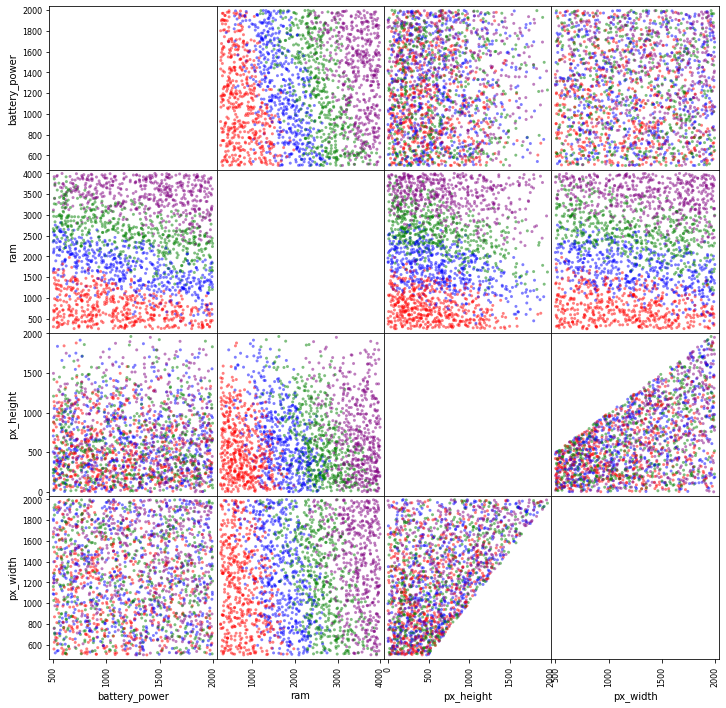

In [23]:
from pandas.plotting import scatter_matrix

dic_colors = { 0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'black', 5: 'yellow', 6: 'orange', 7: 'brown'}
colors = df['price_range'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal=None, color=colors)
print('Scatter matrix:')

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Al contrario que en los clusters, en los árboles no es necesario normalizar ni estandarizar los datos, ya que la escala de las disntinas variables no afecta negativamente a los cálculos.

## 4) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando el número mínimo de ejemplos para dividir un nodo (parámetro `min_samples_split`) y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

Dividimos el dataset en partes de entrenamiento y validación.

In [29]:
from sklearn.model_selection import train_test_split

data_train, X_test, labels_train, labels_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size=0.3, random_state=222)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import numpy as np

# Creamos el árbol que use la entropia como criterio de serapación de variables.
clf = DecisionTreeClassifier(random_state=222, criterion='entropy')
clf = clf.fit(data_train, labels_train)


# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, df.iloc[:, :-1], df.iloc[:, -1:], scoring='accuracy', 
                        cv=10, return_train_score=True)

# scores es un diccionario con datos sobre tiempos y exactitud (accuracy)
train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(1.0, 0.8709999999999999)

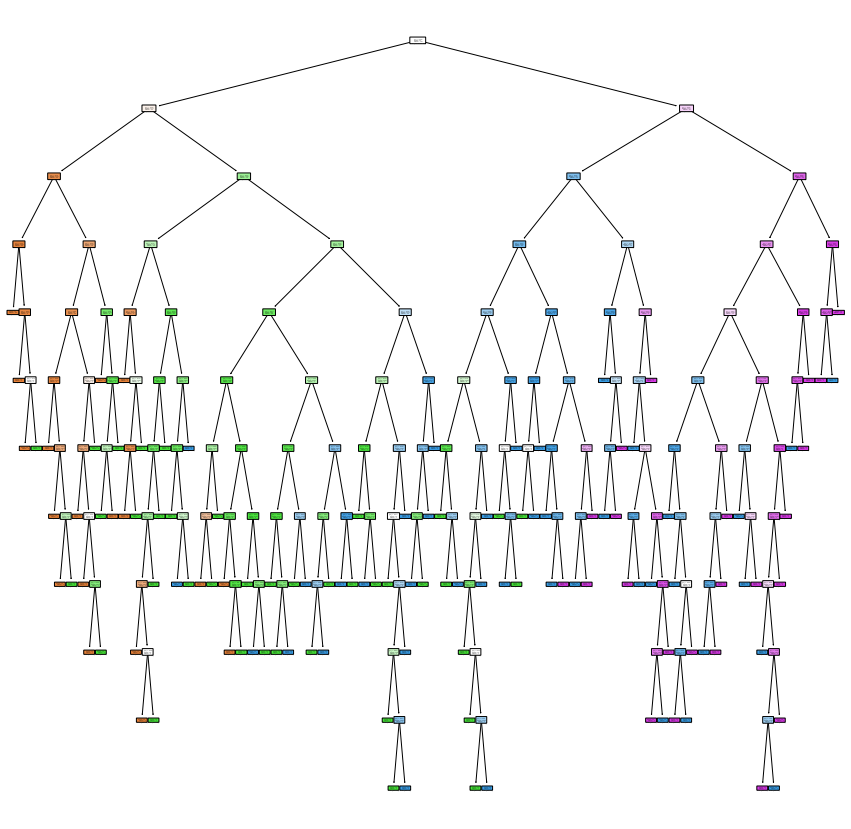

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, rounded=True)
plt.show()

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

## 7) **OPCIONAL**: Usando el clasificador k-NN 
Intenta resolver el mismo problema usando un clasificador k-NN. Para ello, elige las variables que consideres más relevantes para el problema, basándote principalmente en el estudio que has hecho del mismo en los apartados anteriores (o alguno adicional que hagas aquí si lo consideras adecuado). Tendrás que decidir, si escalas las variables o no, y qué valor de k consideras el más adecuado.

Analiza los resultados obtenidos y di por qué crees que suceden.
